In [54]:
import pandas as pd
import numpy as np
import seaborn as sns

In [88]:
df = pd.read_csv('raw_data.csv', sep=';')

In [89]:
df

,patient_name,cell_name,cell_type,patient_state,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,...,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999,spectre
0,P2_ULC80,P2_ULC80_M1_L1_ROI1_C1,B,malade,86.256404,84.116425,83.269485,73.725729,69.172432,58.695397,...,345.330540,343.913899,340.570137,336.092245,329.088472,324.055107,314.110388,319.853392,335.922163,3.0
1,P2_ULC80,P2_ULC80_M1_L1_ROI1_C1,B,malade,72.367814,70.946072,73.946121,69.342146,66.510280,51.961781,...,329.497317,330.293120,334.239066,336.958602,332.810752,337.041213,329.390541,317.220241,289.615842,2.0
2,P2_ULC80,P2_ULC80_M1_L1_ROI1_C1,B,malade,36.107124,50.509171,61.251275,60.634079,59.005082,43.374480,...,349.773008,362.963878,377.543505,369.898047,347.525042,324.241500,304.862554,313.958545,356.180451,1.0
3,P2_ULC80,P2_ULC80_M1_L1_ROI1_C2,B,malade,75.073652,57.880571,53.339291,47.543917,51.896103,40.910901,...,316.498420,323.193044,321.317859,310.282294,326.497336,339.002563,345.054206,372.404114,414.603390,2.0
4,P2_ULC80,P2_ULC80_M1_L1_ROI1_C2,B,malade,51.591270,54.161436,63.649577,58.364222,61.095665,47.811723,...,324.027328,320.147621,318.339477,310.159782,313.315257,333.873758,339.270424,352.541981,351.914705,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,P1_ULC156,P1_ULC156_M1_L1_ROI2_C43,TNK,sain,79.899533,106.561057,113.545793,116.775563,108.161449,96.394401,...,353.242721,342.554395,338.234888,349.217179,354.196203,357.833444,369.658252,378.589869,394.833234,3.0
7193,P1_ULC156,P1_ULC156_M1_L1_ROI2_C43,TNK,sain,86.579106,64.318268,53.031208,60.351759,73.065302,72.644425,...,336.118073,345.712805,338.797810,339.772543,345.702042,353.963123,356.027565,351.790370,342.570314,1.0
7194,P1_ULC156,P1_ULC156_M1_L1_ROI2_C44,B,sain,86.193622,67.082583,62.158704,66.058526,76.819090,76.931321,...,340.361834,348.195007,342.144712,357.687618,361.788879,362.309974,358.883856,355.593313,357.331293,1.0
7195,P1_ULC156,P1_ULC156_M1_L1_ROI2_C44,B,sain,89.962557,89.573056,90.300399,93.353796,96.570792,104.798885,...,370.213484,370.174949,373.407591,379.524429,382.040521,376.632795,377.164771,366.349519,363.434051,2.0


In [6]:
print("Nombre de spectres :", len(df))
print("Nombre de patients :", df.patient_name.nunique())
print("Nombre de cellules :", df.cell_name.nunique())
#print("Ratio de patients malade", df.groupby('patient_name')['patient_state'].agg())

Nomre de spectres : 7197
Nombre de patients : 33
Nombre de cellules : 2568


In [76]:
# Show number of patients in each state
df['patient_state'].groupby(df['patient_name']).agg('first').value_counts()

sain      19
malade    14
Name: patient_state, dtype: int64

In [8]:
# Combien de cellules B ont les patients malades ? : PLUS DE 50% EN MOYENNE
# Toutes les cellules n'ont pas 3 spectres !
# Comment utiliser les amplitudes de chacunes des ondes ?
# Combien de cellules ont les patients en moyenne ? 
# ON VEUT PREDIRE SI UNE CELLULE EST B OU TNK
# Tester sans padding en copiant spectre 1 sur autre spectre : BOF 
# Modèle par spectre ou par cellule ? : MODELE PAR SPECTRE

# Faire une PCA ?
# Plot 2 dimensions spectre avec couleur pour cellule B ou TNK : PAS CONCLUANT
# Un patient malade a t'il plus de cellule qu'un patient sain ? NON

In [10]:
# Grouper par patient et par cellule
cell_df = df.groupby(['patient_name','cell_name']).agg({'cell_type':"first",'patient_state':"first","spectre":'count'})
cell_df

cell_type patient_state  spectre
patient_name cell_name                                                
P1_ULC100    P1_ULC100_M1_L1_ROI1_C1        TNK          sain        3
             P1_ULC100_M1_L1_ROI1_C11       TNK          sain        2
             P1_ULC100_M1_L1_ROI1_C2        TNK          sain        2
             P1_ULC100_M1_L1_ROI1_C3        TNK          sain        1
             P1_ULC100_M1_L1_ROI1_C4        TNK          sain        3
...                                         ...           ...      ...
P2_ULC99     P2_ULC99_M1_L1_ROI1_C50          B        malade        2
             P2_ULC99_M1_L1_ROI1_C6           B        malade        2
             P2_ULC99_M1_L1_ROI1_C7           B        malade        2
             P2_ULC99_M1_L1_ROI1_C8           B        malade        1
             P2_ULC99_M1_L1_ROI1_C9           B        malade        1

[2568 rows x 3 columns]

3    2209
2     211
1     148
Name: spectre, dtype: int64


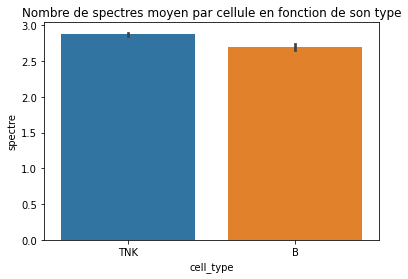

In [86]:
print(cell_df['spectre'].value_counts())
plot = sns.barplot(data=cell_df, x="cell_type",y="spectre")\
            .set_title('Nombre de spectres moyen par cellule en fonction de son type')

In [11]:
cell_df['TNK'] = np.where(cell_df['cell_type']=='TNK', 1, 0)
cell_df['B'] = np.where(cell_df['cell_type']=='B', 1, 0)
cell_count = cell_df.groupby('patient_name').agg({'TNK':sum, 'B':sum, 'patient_state':"first", 'spectre':'sum'})
cell_count['cell_number'] = cell_count['TNK'] + cell_count['B']
cell_count['ratio_B'] = cell_count['B']/cell_count['cell_number']
cell_count.sort_values("ratio_B", ascending=False)

,TNK,B,patient_state,spectre,cell_number,ratio_B
patient_name,,,,,,
P2_ULC81,0,66,malade,198,66,1.000000
P2_ULC96,1,69,malade,195,70,0.985714
P2_ULC88,1,64,malade,139,65,0.984615
P2_ULC99,1,46,malade,63,47,0.978723
P2_ULC135,2,51,malade,158,53,0.962264
P2_ULC93,4,54,malade,97,58,0.931034
P2_ULC80,4,50,malade,158,54,0.925926
P2_ULC146,11,115,malade,360,126,0.912698
P2_ULC128,12,95,malade,315,107,0.887850


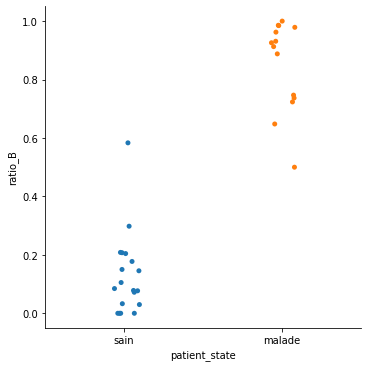

In [12]:
sns.catplot(x="patient_state", y="ratio_B", data=cell_count)

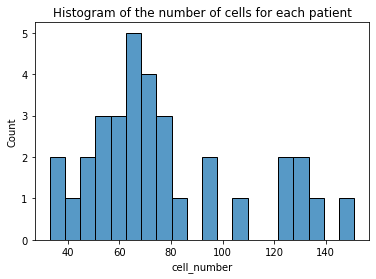

In [14]:
a = sns.histplot(cell_count['cell_number'], bins=20).set_title("Histogram of the number of cells for each patient")

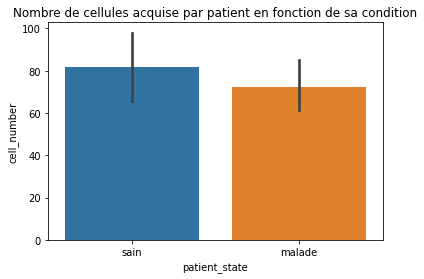

In [85]:
plot = sns.barplot(data=cell_count, x="patient_state",y="cell_number")\
            .set_title('Nombre de cellules acquise par patient en fonction de sa condition')

In [65]:
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

df['cell_type'] = df['cell_type'].replace('B',1)
df['cell_type'] = df['cell_type'].replace('TNK',0)

col_spectre = df.columns[4:-1]
other_col = ["patient_name",'cell_name','cell_type','patient_state','spectre']

pca = PCA(n_components=2)
pls = PLSRegression(n_components=2)

spectre_transformed = pls.fit_transform(df[col_spectre], df["cell_type"])[0]
spectre_transformed = pd.DataFrame(spectre_transformed)
spectre_transformed.columns = ['feature_1','feature_2']


df_pca = pd.concat([df[other_col],spectre_transformed], axis=1)

<AxesSubplot:xlabel='feature_1', ylabel='feature_2'>

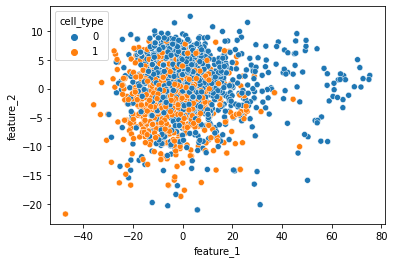

In [68]:
sns.scatterplot(data=df_pca.sample(2000),x='feature_1', y='feature_2', hue='cell_type')